In [1]:
%matplotlib widget

import numpy as np
from scipy.signal import argrelextrema
from matplotlib import pyplot as plt
import pandas as pd



In [2]:
x = np.array([2, 1, 2, 3, 2, 0, 1, 0])


In [3]:
r = argrelextrema(x, np.greater) #position of resistances

In [4]:
r

(array([3, 6]),)

In [5]:
s = argrelextrema(x, np.less) #position of supports

In [6]:
s

(array([1, 5]),)

In [7]:
min_period = 300
N = 14
df = pd.read_csv(f"data/USDT_BTC_{min_period}_1425168000_73.csv")
df.rename(columns={'date':'epoch','ts':'date'},inplace=True)
assert df.loc[0,'period'] == min_period, "Error, period different from min_period"
assert df['period'].count() == df.shape[0], "Error, period not always is min_period" 
df.drop(columns=['period','currency_pair','quoteVolume','weightedAverage'],inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by="date") #just in case
df.set_index('date',inplace=True)
df

,epoch,high,low,open,close,volume
date,,,,,,
2015-03-01 00:00:00,1425168000,240.000060,240.000060,240.000060,240.000060,0.000000
2015-03-01 00:05:00,1425168300,240.000060,240.000060,240.000060,240.000060,0.000000
2015-03-01 00:10:00,1425168600,240.000060,240.000060,240.000060,240.000060,0.000000
2015-03-01 00:15:00,1425168900,240.000060,240.000060,240.000060,240.000060,0.000000
2015-03-01 00:20:00,1425169200,240.000060,240.000060,240.000060,240.000060,0.000000
...,...,...,...,...,...,...
2021-03-31 23:35:00,1617233700,58802.587059,58761.857003,58801.000000,58762.000000,29415.195318
2021-03-31 23:40:00,1617234000,58798.268464,58744.683295,58762.000000,58795.050899,169054.589184
2021-03-31 23:45:00,1617234300,58866.551166,58795.050899,58795.050899,58810.585631,4315.762275


In [8]:
daily_df = df.resample('D').agg({'epoch':'first','high':'max','low':'min','open':'first','close':'last','volume':'sum'})

In [9]:
daily_df.reset_index(inplace=True)

In [10]:
resistances = argrelextrema(daily_df.high.to_numpy(),np.greater,order=4)

In [11]:
resistances = resistances[0]

In [12]:
daily_df

,date,epoch,high,low,open,close,volume
0,2015-03-01,1425168000,251.000000,240.000060,240.000060,251.000000,3.177152e-01
1,2015-03-02,1425254400,269.000000,251.000000,251.000000,269.000000,9.806380e+01
2,2015-03-03,1425340800,274.500000,255.000000,269.000000,267.220000,4.429831e+02
3,2015-03-04,1425427200,280.000000,258.875000,267.220000,280.000000,2.458890e+02
4,2015-03-05,1425513600,280.890000,257.000000,280.000000,257.000120,1.174407e+02
...,...,...,...,...,...,...,...
2218,2021-03-27,1616803200,56645.325460,53967.742633,55008.350978,55855.274815,2.880248e+07
2219,2021-03-28,1616889600,56517.750699,54700.000000,55828.000000,55773.962120,2.379101e+07
2220,2021-03-29,1616976000,58332.142365,54940.245881,55769.134151,57620.809447,4.498012e+07
2221,2021-03-30,1617062400,59360.000000,57085.000000,57614.000000,58748.000000,2.964910e+07


In [13]:
%matplotlib inline
plt.style.use("seaborn")

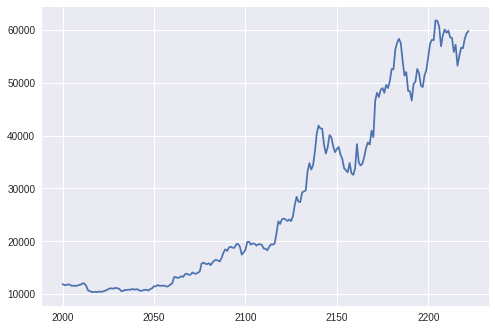

In [14]:
#daily_df.loc[2000:,'high'].plot()

plt.plot(daily_df.loc[2000:,'high'])

In [15]:
x = daily_df.loc[resistances,'high']
type(x)
x


12        301.000000
22        274.298098
60        255.000000
79        260.000000
98        243.000000
            ...     
2140    41888.000000
2161    38380.000000
2184    58320.000000
2194    52605.813647
2204    61799.000000
Name: high, Length: 158, dtype: float64

In [16]:
daily_df['resistance'] = 0
x = daily_df.loc[resistances,'resistance']
x

12      0
22      0
60      0
79      0
98      0
       ..
2140    0
2161    0
2184    0
2194    0
2204    0
Name: resistance, Length: 158, dtype: int64

In [17]:
print(x.index)

Int64Index([  12,   22,   60,   79,   98,  110,  121,  127,  133,  150,
            ...
            2052, 2077, 2096, 2102, 2121, 2140, 2161, 2184, 2194, 2204],
           dtype='int64', length=158)


In [18]:
type(resistances)
resistances

array([  12,   22,   60,   79,   98,  110,  121,  127,  133,  150,  174,
        194,  212,  220,  230,  248,  262,  274,  290,  298,  307,  313,
        325,  341,  348,  357,  366,  376,  382,  392,  425,  435,  441,
        455,  461,  475,  489,  499,  504,  527,  541,  560,  613,  619,
        629,  642,  676,  693,  711,  726,  733,  740,  745,  772,  802,
        816,  833,  842,  856,  872,  900,  916,  932,  946,  959,  965,
        983, 1022, 1032, 1042, 1064, 1087, 1100, 1116, 1129, 1141, 1151,
       1161, 1176, 1190, 1206, 1219, 1226, 1242, 1263, 1270, 1283, 1293,
       1301, 1307, 1317, 1324, 1347, 1369, 1394, 1409, 1420, 1427, 1434,
       1440, 1456, 1469, 1476, 1481, 1494, 1501, 1514, 1535, 1551, 1578,
       1592, 1602, 1619, 1633, 1639, 1650, 1675, 1685, 1700, 1709, 1734,
       1744, 1758, 1764, 1774, 1785, 1796, 1810, 1833, 1846, 1851, 1864,
       1875, 1887, 1894, 1905, 1919, 1928, 1934, 1940, 1949, 1956, 1981,
       1989, 1996, 2011, 2029, 2038, 2052, 2077, 20

In [19]:
daily_df.loc[resistances,'resistance'] = 1

In [20]:
daily_df

,date,epoch,high,low,open,close,volume,resistance
0,2015-03-01,1425168000,251.000000,240.000060,240.000060,251.000000,3.177152e-01,0
1,2015-03-02,1425254400,269.000000,251.000000,251.000000,269.000000,9.806380e+01,0
2,2015-03-03,1425340800,274.500000,255.000000,269.000000,267.220000,4.429831e+02,0
3,2015-03-04,1425427200,280.000000,258.875000,267.220000,280.000000,2.458890e+02,0
4,2015-03-05,1425513600,280.890000,257.000000,280.000000,257.000120,1.174407e+02,0
...,...,...,...,...,...,...,...,...
2218,2021-03-27,1616803200,56645.325460,53967.742633,55008.350978,55855.274815,2.880248e+07,0
2219,2021-03-28,1616889600,56517.750699,54700.000000,55828.000000,55773.962120,2.379101e+07,0
2220,2021-03-29,1616976000,58332.142365,54940.245881,55769.134151,57620.809447,4.498012e+07,0
2221,2021-03-30,1617062400,59360.000000,57085.000000,57614.000000,58748.000000,2.964910e+07,0


In [21]:
y = pd.Series(np.zeros(daily_df.high.size))

In [22]:
y.mask(daily_df.resistance == 1,daily_df.high,inplace=True)

daily_df['y'] = y

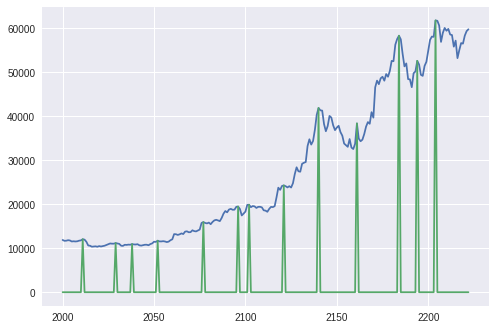

In [23]:
plt.plot(daily_df.loc[2000:,'high'])
plt.plot(daily_df.loc[2000:,'y'])

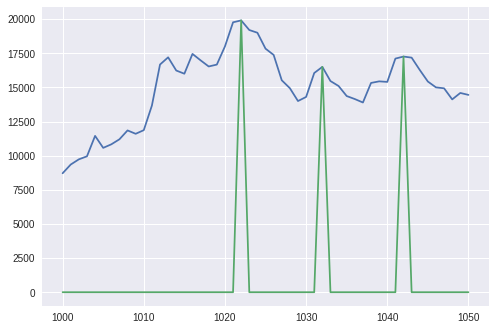

In [24]:
plt.plot(daily_df.loc[1000:1050,'high'])
plt.plot(daily_df.loc[1000:1050,'y'])